<h1>Data Set 2</h1>

<h2>1. Data Exploration</h2>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TrainData2.txt', sep='\s+', header = None)
labels = pd.read_csv('TrainLabel2.txt', header=None, names=['target'])
df['target'] = labels['target']

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,9173,9174,9175,9176,9177,9178,9179,9180,9181,target
0,2.357935,1.505150,1.477121,1.301030,2.992995,1.301030,2.729974,3.275542,3.531734,2.117271,...,1.792392,2.000000,1.477121,1.919078,1.755875,2.025306,2.107210,1.869232,1.30103,1
1,1.995635,1.633468,1.740363,1.819544,3.703377,1.301030,3.000434,3.118926,3.363424,1.568202,...,2.064458,1.431364,1.633468,1.954243,1.913814,2.685742,2.952308,1.959041,1.30103,1
2,1.929419,1.301030,1.447158,1.301030,3.377852,1.301030,3.053463,3.390405,3.359835,1.707570,...,2.198657,1.301030,1.707570,2.041393,1.934498,1.792392,1.880814,1.963788,1.30103,1
3,2.227887,1.602060,1.556302,1.908485,3.424392,1.301030,3.084219,3.288696,3.364176,1.301030,...,2.204120,1.633468,1.716003,1.913814,2.130334,1.778151,1.838849,1.949390,1.30103,1
4,1.763428,1.623249,1.301030,2.029384,3.551694,1.301030,3.165541,3.141450,3.495128,1.886491,...,1.785330,2.201397,1.623249,1.863323,1.913814,1.778151,1.698970,1.869232,1.30103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.610660,1.698970,1.301030,1.301030,2.161368,1.301030,3.155032,3.161667,3.141450,1.929419,...,1.949390,2.549003,1.770852,1.812913,2.195900,1.633468,1.792392,1.939519,1.30103,11
96,2.720986,1.690196,2.294466,1.397940,1.301030,1.301030,3.174641,4.056371,3.248709,1.301030,...,1.755875,1.301030,2.278754,2.021189,1.959041,1.301030,1.301030,2.303196,1.30103,11
97,2.534026,1.707570,1.301030,1.301030,2.403120,3.033424,3.232996,3.246499,3.013259,1.301030,...,2.257679,2.146128,2.093422,2.004321,2.133539,1.568202,1.724276,2.178977,1.30103,11
98,2.495544,1.643453,1.690196,1.301030,2.403120,2.371068,3.125481,3.230449,3.378398,1.763428,...,1.397940,1.301030,1.857333,1.939519,2.075547,1.301030,1.633468,2.017033,1.30103,11


In [4]:
df['target'].value_counts()

target
3     12
4     11
5     11
1     10
6     10
8      9
10     9
2      8
11     8
7      6
9      6
Name: count, dtype: int64

In [5]:
missing_mask = df == 1e99
print(max(df[missing_mask].count()))


0


<h2>1.a. Data Quality Report</h2>

In [6]:
def data_quality_report(df):
    report_data = []
    for i, column in enumerate(df.columns, 1):
        data = df[column]
        
        # Calculate statistics
        count = len(data)
        missing = (data == 1e99).sum()
        missing_percentage = (missing / count) * 100
        cardinality = data.nunique()
        min_val = data.min()
        q1 = data.quantile(0.25)
        median = data.median()
        q3 = data.quantile(0.75)
        max_val = data.max()
        mean = data.mean()
        std_dev = data.std()
        
        report_data.append({
            'Feature No.': i,
            'Count': count,
            '% of Missing': round(missing_percentage, 2),
            'Cardinality': cardinality,
            'Min.': min_val,
            'Q1': q1,
            'Median': median,
            'Q3': q3,
            'Max.': max_val,
            'Mean': mean,
            'Std. Dev.': std_dev
        })
    
    # Create a DataFrame from the collected data
    report_df = pd.DataFrame(report_data)
    
    return report_df

# Assuming your original DataFrame is named 'df'
quality_report_df = data_quality_report(df)

quality_report_df

,Feature No.,Count,% of Missing,Cardinality,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,1,100,0.0,92,1.763428,2.579211,2.711380,2.854002,3.120903,2.686873,0.251771
1,2,100,0.0,73,1.301030,1.643453,1.845098,2.034424,2.392697,1.821039,0.272712
2,3,100,0.0,62,1.301030,1.393508,1.788861,2.023238,3.116276,1.771865,0.379950
3,4,100,0.0,19,1.301030,1.301030,1.301030,1.301030,2.340444,1.415327,0.241500
4,5,100,0.0,65,1.301030,1.301030,2.191620,2.941649,3.717504,2.247882,0.832275
...,...,...,...,...,...,...,...,...,...,...,...
9178,9179,100,0.0,54,1.301030,1.301030,1.585424,2.005297,2.685742,1.679096,0.381283
9179,9180,100,0.0,66,1.301030,1.301030,1.792392,2.167199,2.952308,1.836461,0.452108
9180,9181,100,0.0,87,1.612784,2.040401,2.181834,2.387390,3.324694,2.213711,0.269829
9181,9182,100,0.0,7,1.301030,1.301030,1.301030,1.301030,3.130655,1.362856,0.266139


<h2> 2. Feature Selection </h2>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns     

In [8]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

<h3>2.a. PCA</h3>

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Get the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components that explain, say, 
n_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

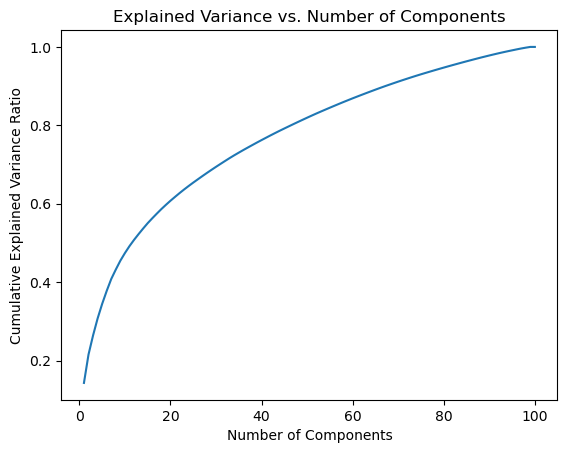

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [12]:
pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(X_pca_final.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,-78.386800,-19.162722,-46.229939,-1.584545,9.715577,-6.292830,10.646226,-0.796851,3.585530,-0.153087,...,-0.335049,3.125118,-0.838364,-3.480910,2.399935,-1.991308,3.599513,0.387836,-2.524872,-1.711083
1,-66.377456,-29.176538,-40.381977,6.391556,17.572486,-9.381215,13.034366,-7.903978,-1.524884,9.615414,...,-2.105430,0.288305,1.066300,-1.029811,0.009051,2.957484,3.041085,6.829297,-0.134101,0.508724
2,-31.781290,-24.858962,-47.964820,-6.677947,21.982498,-11.856729,6.052061,0.186121,0.468027,0.519082,...,2.088481,-1.011809,-3.481537,1.667054,-0.200688,0.001565,-1.134815,0.814099,-0.472618,-0.494250
3,-43.921750,-21.327406,-45.529266,-0.388204,17.084396,-10.314093,12.070671,-3.766775,0.390429,4.785578,...,-1.353286,2.016751,1.520865,-0.794355,2.901536,-7.540233,-9.184597,0.015016,-3.919463,-2.933627
4,-65.003377,-20.548369,-37.517013,-3.497904,5.456221,-12.240942,11.376842,-6.147533,8.811956,-3.327102,...,-6.800675,-0.217129,-1.294952,3.055095,-0.750898,-4.806989,-1.782897,1.614393,-0.592607,1.040349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-43.876072,18.882345,23.493159,-0.176617,-26.127873,-10.318636,18.219465,-23.712370,-12.379483,9.547623,...,-3.324445,7.440102,-5.680340,-7.190208,5.586620,-1.490788,10.849397,8.244413,5.863816,-1.757526
96,50.004972,11.265968,-5.502137,-15.129806,0.611690,4.627451,46.779298,-5.979598,5.551918,-3.767976,...,-7.301150,-4.344984,13.949226,-6.083750,-5.140768,-10.250792,3.672375,0.285549,0.028320,1.721389
97,-16.920391,4.202274,23.530191,-6.273668,-17.926279,-15.239291,17.101643,-15.211367,1.434358,-9.212941,...,-0.446032,-2.117881,5.266620,3.186658,-12.446289,-2.406787,7.838997,-5.996328,-1.747434,0.713165
98,-31.102296,26.154548,29.799112,0.339345,-16.851713,-12.154210,26.223108,-13.552705,-13.454208,10.132285,...,-0.667570,-9.069263,4.335263,-1.915313,-0.187142,5.566608,0.741048,-0.859379,-2.115713,-2.253609


<h2> 3. Training and Evaluation </h2>

<h3>3.a. SVM</h3>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_df, y, train_size=0.7, random_state=42)

X_train.shape, X_test.shape

((70, 47), (30, 47))

In [15]:
from imblearn.over_sampling import SMOTE

print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

Original training set class distribution:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([7, 5, 9, 6, 8, 8, 6, 4, 4, 6, 7]))


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear','sigmoid']
}


svm = SVC(random_state=42)


grid_search = GridSearchCV(svm, param_grid, cv=4, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_svm = grid_search.best_estimator_


print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [18]:
# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 score (macro average)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Calculate precision (macro average)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (macro): {precision:.4f}")

# Calculate recall (macro average)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (macro): {recall:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333
F1 Score (macro): 0.8709
Precision (macro): 0.8833
Recall (macro): 0.8667

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         1

    accuracy                           0.93        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.94      0.93      0.93        30



<h3>3.b. Random Forest</h3>

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Example hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=4, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_

/Users/sam/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       0.43      1.00      0.60         3
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           8       1.00      0.40      0.57         5
           9       1.00      1.00      1.00         2
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.79      0.75      0.74        30
weighted avg       0.86      0.77      0.77        30



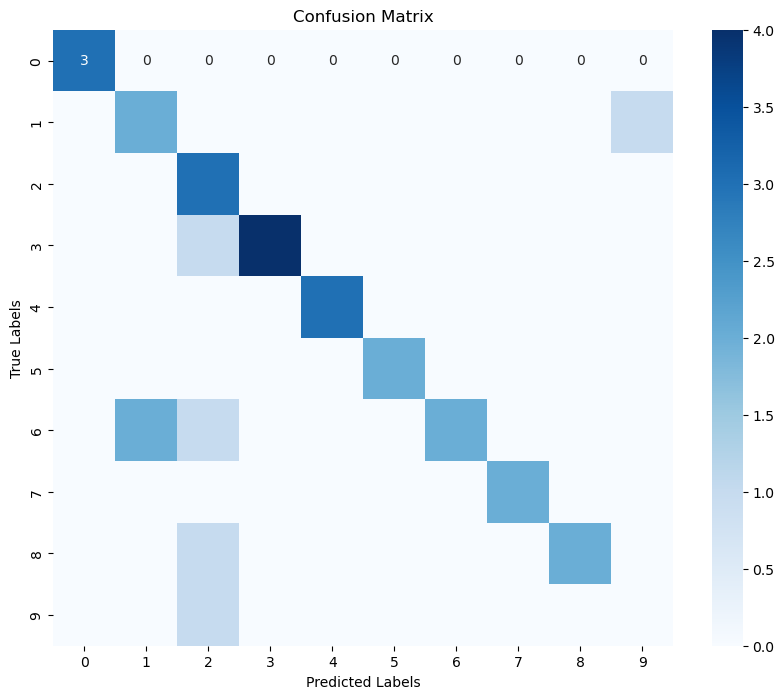

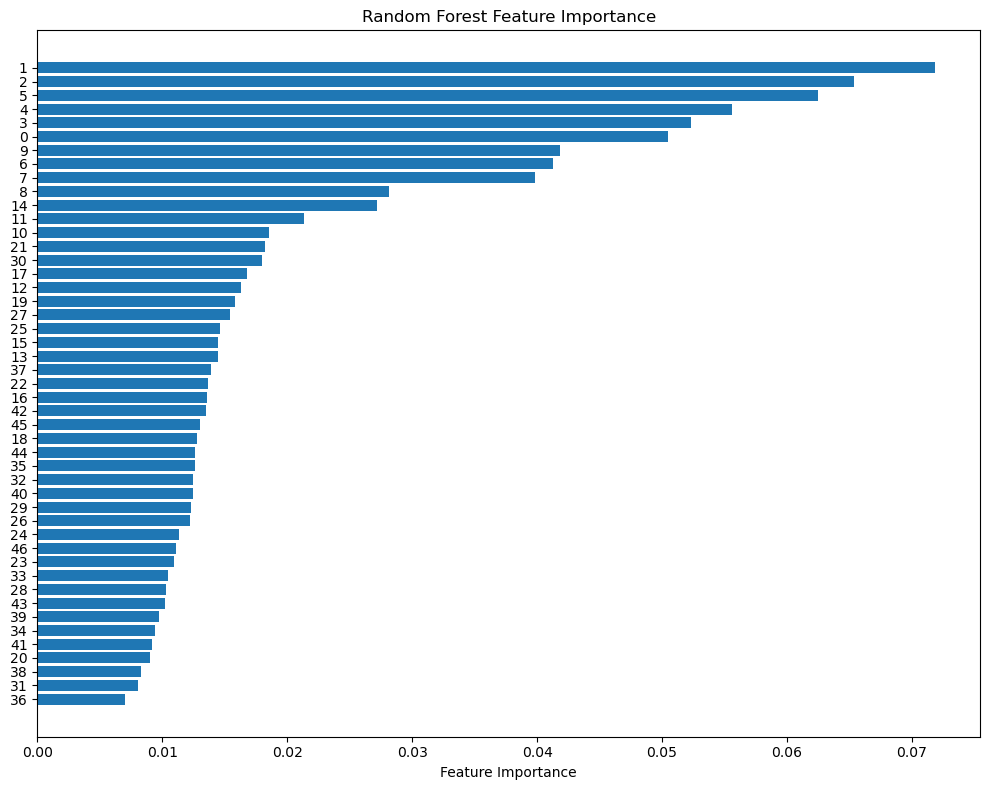

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


feature_importance = best_rf_model.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame


sorted_idx = np.argsort(feature_importance)
sorted_features = feature_names[sorted_idx]


plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

<h3>3.c. XG Boost</h3>

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [27]:
from xgboost import XGBClassifier

# Step 1: Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 2: Create the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=4, scoring='f1_macro', n_jobs=-1, verbose=2)

# Step 4: Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best model
best_xgb = grid_search.best_estimator_

# Step 6: Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Step 7: Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Step 8: Calculate and print various metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")

# Step 9: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.7333
F1 Score (macro): 0.6910
Precision (macro): 0.7050
Recall (macro): 0.7333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      0.67      0.67         3
           2       0.75      1.00      0.86         3
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           7       0.50      0.20      0.29         5
           8       0.33      1.00      0.50         2
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         1

    accuracy                           0.73        30
   macro avg       0.70      0.73      0.69        3

/Users/sam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/anaconda3/lib/python3.11/site-packag

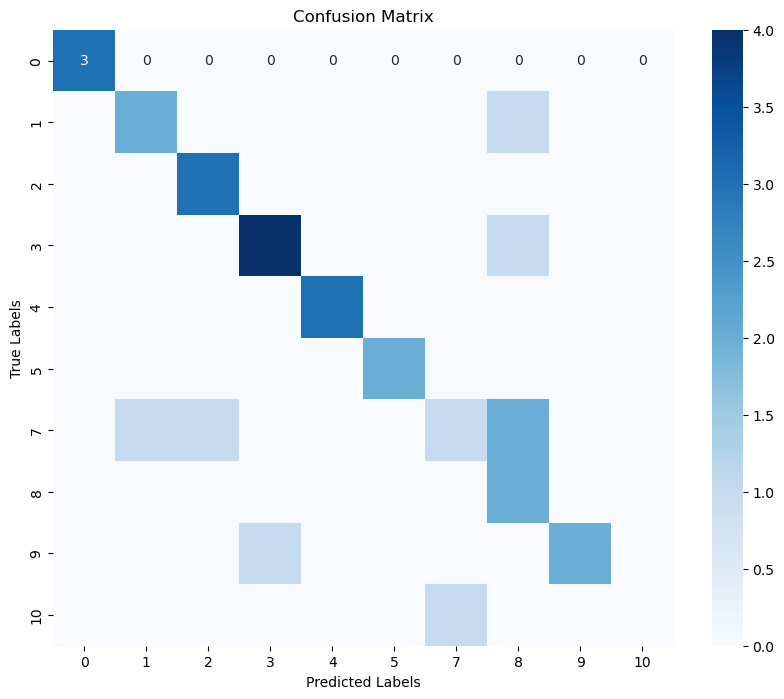

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Step 3: Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
cm